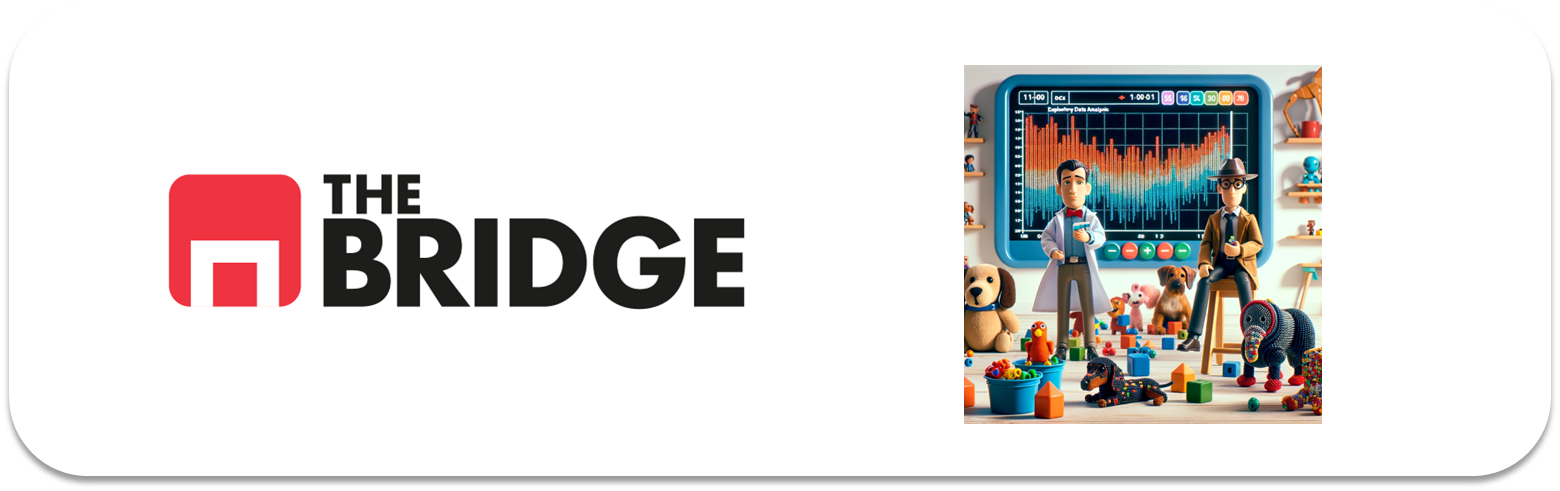

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [2]:
pip install pandas

  Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl (11.3 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 11.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [59]:
from scipy import stats

In [6]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [8]:
df_titanic = pd.read_csv("./data/titanic.csv")
df = df_titanic.copy()

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [ ]:
df.drop(columns = ["deck","survived", "pclass", "embarked"], inplace = True )

In [10]:
df.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [12]:
df["family_members"] = df["parch"] + df["sibsp"]
df.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,0


In [13]:
df.drop(columns = ["parch","sibsp"], inplace = True )

In [14]:
df.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [15]:
mode_embark_town = df["embark_town"].mode()[0]
df['embark_town'] = df['embark_town'].fillna(mode_embark_town)

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [20]:
mean_age_by_who = df.groupby('who')['age'].mean()
mean_age_by_who
mean_age_woman = mean_age_by_who['woman']
mean_age_man = mean_age_by_who['man']
mean_age_child = mean_age_by_who['child']



In [ ]:
df['age'] = df['age'].fillna(df.groupby('who')['age'].transform('mean'))

In [23]:
df.isnull().mean()*100

sex               0.0
age               0.0
fare              0.0
class             0.0
who               0.0
adult_male        0.0
embark_town       0.0
alive             0.0
alone             0.0
family_members    0.0
dtype: float64

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

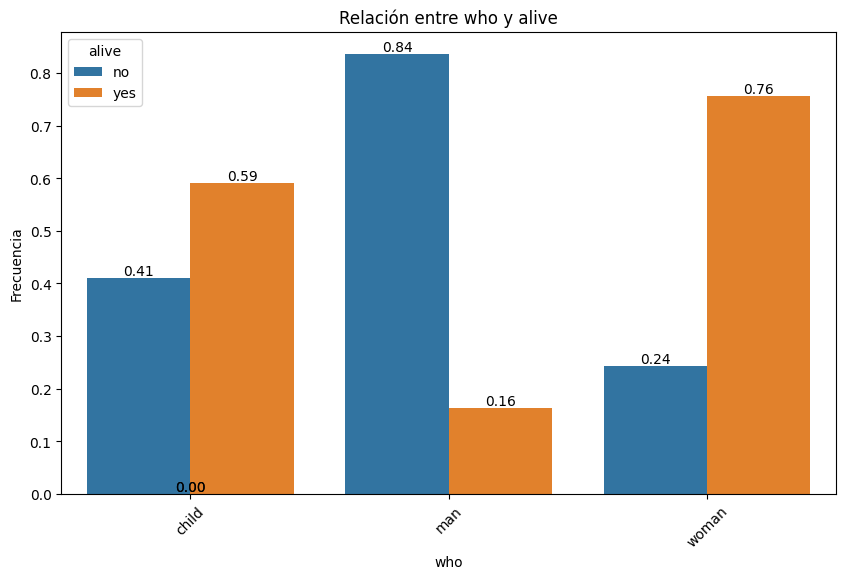

In [ ]:
#1.
plot_categorical_relationship_fin(df, "who","alive", relative_freq = True, show_values = True)
 #en terminos relativos sobrevivieron más mujeres y niños

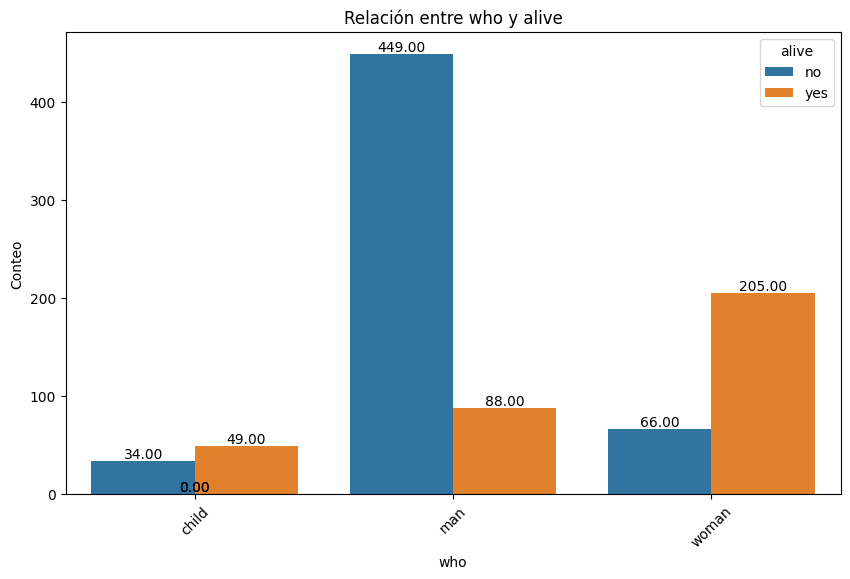

In [27]:
plot_categorical_relationship_fin(df, "who","alive", relative_freq = False, show_values = True)

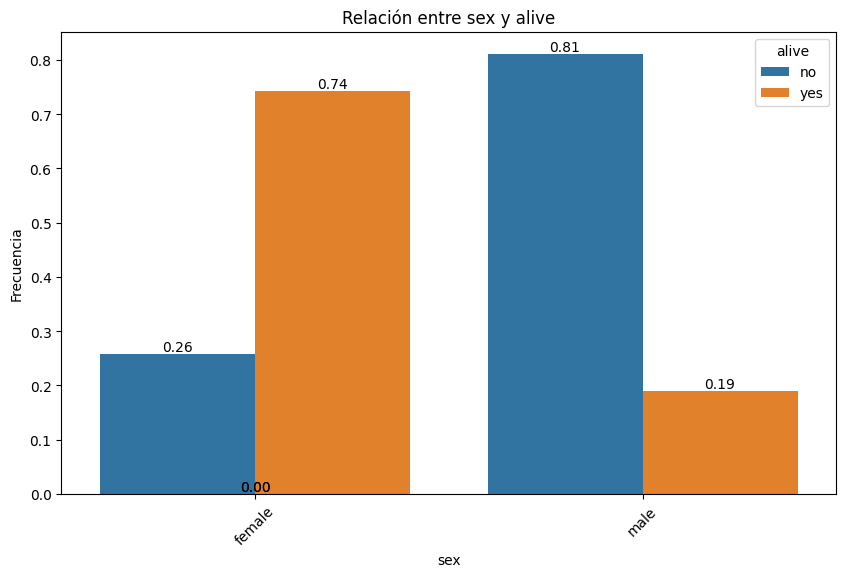

In [37]:
plot_categorical_relationship_fin(df, "sex","alive", relative_freq = True, show_values = True)

In [30]:
tabla_contingencia = pd.crosstab(df['who'], df['alive'])

tabla_contingencia

alive,no,yes
who,,
child,34,49
man,449,88
woman,66,205


In [33]:
from scipy.stats import chi2_contingency

In [ ]:


chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

#Hay una relacion significativa entre ser adulto o niño y la supervivencia

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414  31.85858586]
 [330.87878788 206.12121212]
 [166.97979798 104.02020202]]


In [ ]:
tabla_contingencia2 = pd.crosstab(df['sex'], df['alive'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia2)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

#Hay una relacion significativa entre ser el género y la supervivencia

Valor Chi-Cuadrado: 260.71702016732104
P-Value: 1.197357062775565e-58
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


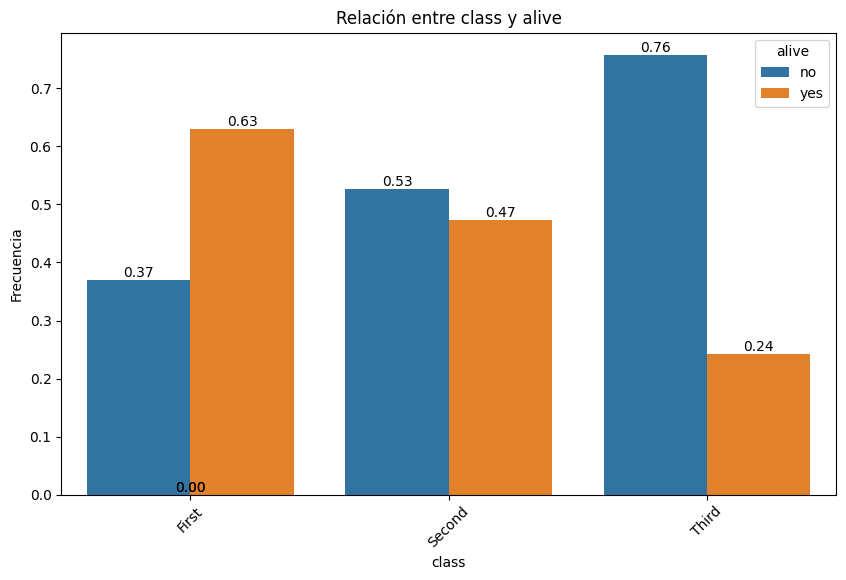

In [38]:
#2
plot_categorical_relationship_fin(df, "class","alive", relative_freq = True, show_values = True)


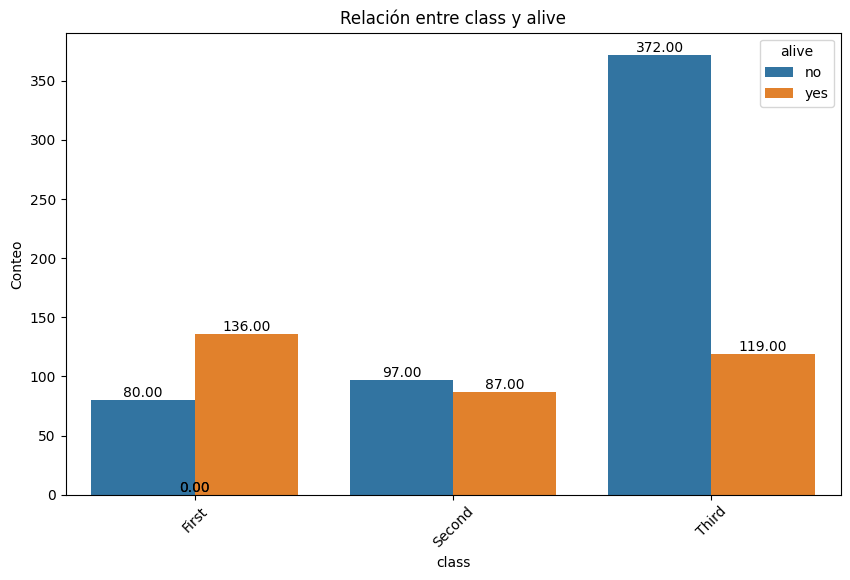

In [39]:
plot_categorical_relationship_fin(df, "class","alive", relative_freq = False, show_values = True)

In [ ]:
tabla_contingencia3 = pd.crosstab(df['class'], df['alive'])

tabla_contingencia
chi2, p, dof, expected = chi2_contingency(tabla_contingencia3)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

#Hay una relacion significativa entre ser la clase y la supervivencia

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


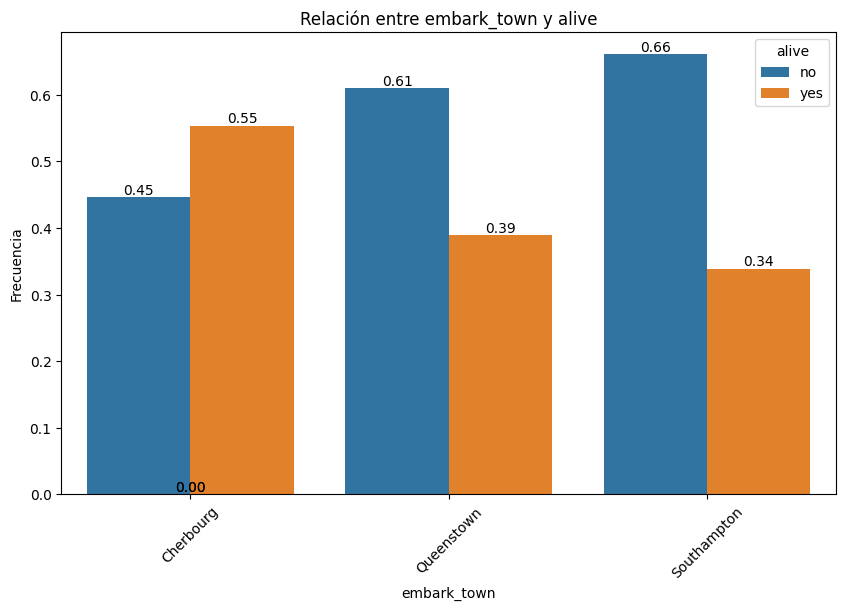

In [44]:
#3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? 
# ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?
plot_categorical_relationship_fin(df, "embark_town","alive", relative_freq = True, show_values = True)



In [ ]:
tabla_contingencia4 = pd.crosstab(df['embark_town'], df['alive'])
tabla_contingencia4
chi2, p, dof, expected = chi2_contingency(tabla_contingencia4)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)
#Hay una relacion significativa entre dónde embarcaron (aunque también puede ser por la cantidad de pasajeros que embarcaron) y la supervivencia


Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  64.48484848]
 [ 47.44444444  29.55555556]
 [398.04040404 247.95959596]]


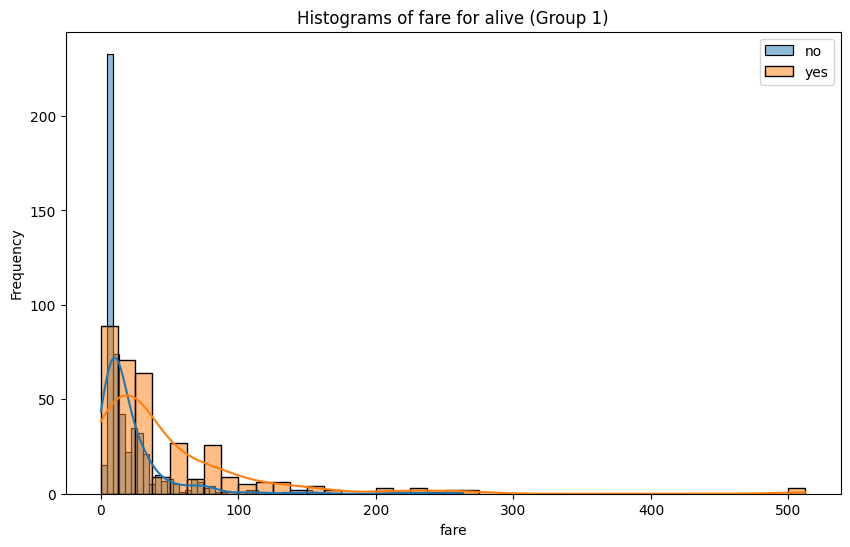

In [55]:
#4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?
plot_grouped_histograms(df,"alive", "fare", 5)

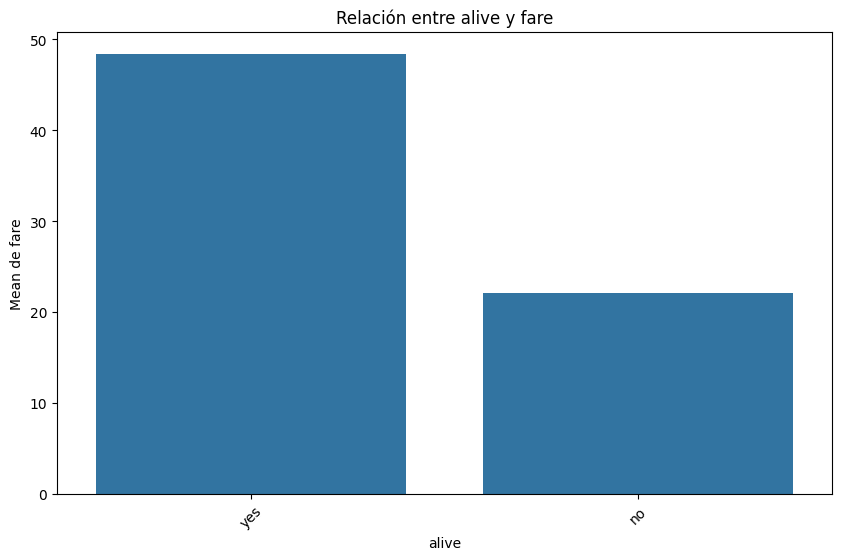

In [54]:
plot_categorical_numerical_relationship(df,"alive","fare", measure = "mean")

In [56]:
df.groupby("alive")["fare"].describe()

,count,mean,std,min,25%,50%,75%,max
alive,,,,,,,,
no,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
yes,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


In [ ]:
grupos = df['alive'].unique()  # Obtener los valores únicos de la columna categórica, en este caso la supervivencia
alive_fare = [df[df['alive'] == grupo]['fare'] for grupo in grupos] # obtenemos los fare por los supervivientes y los incluimos en una lista
alive_fare
f_val, p_val = stats.f_oneway(*alive_fare) # El método * (igual que cuando vimos *args hace mil años) 
                                                    # lo que hace es separar todos los elementos de la lista y pasarselos como argumento a la función
print("Valor F:", f_val)
print("Valor p:", p_val)
#Ahora como el p-value es menor que 0.05, rechazamos la hipótesis nula y reafirmamos la alternativa o contraria, 
# es decir que sí que el fare tiene relacion estadística con la supervivencia

Valor F: 63.03076422804448
Valor p: 6.120189341921873e-15


#5 Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?
No han debido de pagar los niños el billete.


In [62]:
max_fare_row = df.loc[df['fare'].idxmax()]
survived = max_fare_row['alive']
if survived == 1:
    print("Sobrevivió.")
else:
    print("No sobrevivió.")

No sobrevivió.


In [ ]:
#6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento.
#  No necesitas aplicar ningún test, muestralo numérica o visualmente.

In [95]:
columnas = ["alive","fare", "embark_town"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df[col_directora].unique():
    diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta no:


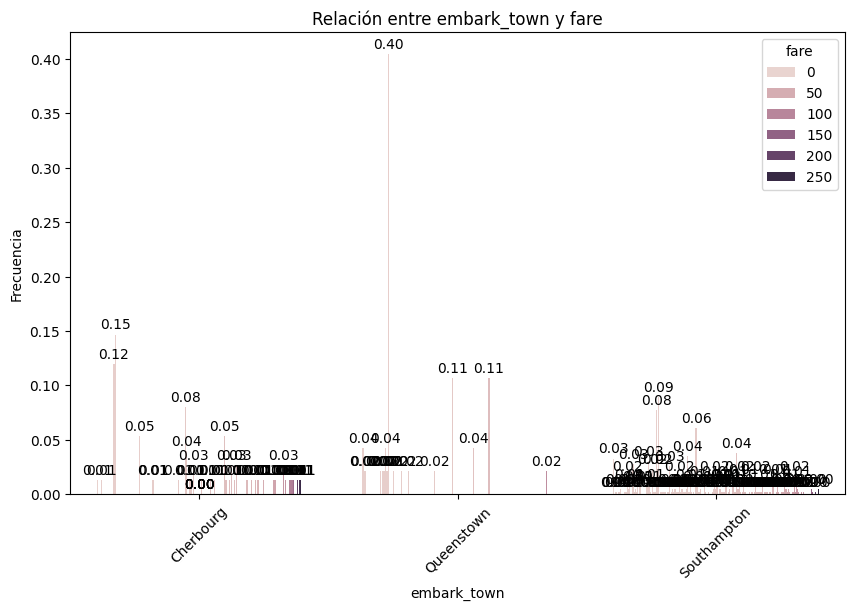

Respuesta yes:


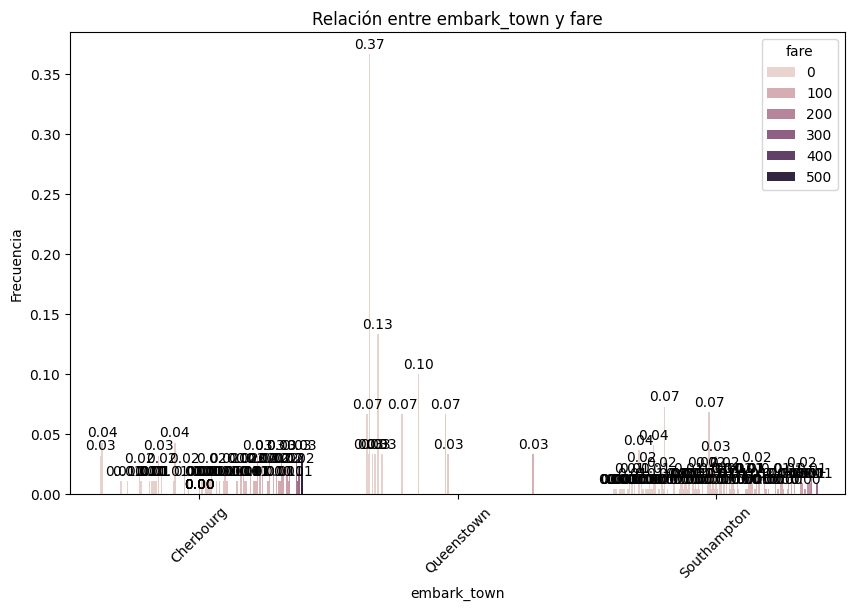

In [106]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True, size_group = 7)

In [110]:

#7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros.
#  ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

columnas = ["alive","age", "class"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df[col_directora].unique():
    diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]]

Respuesta no:


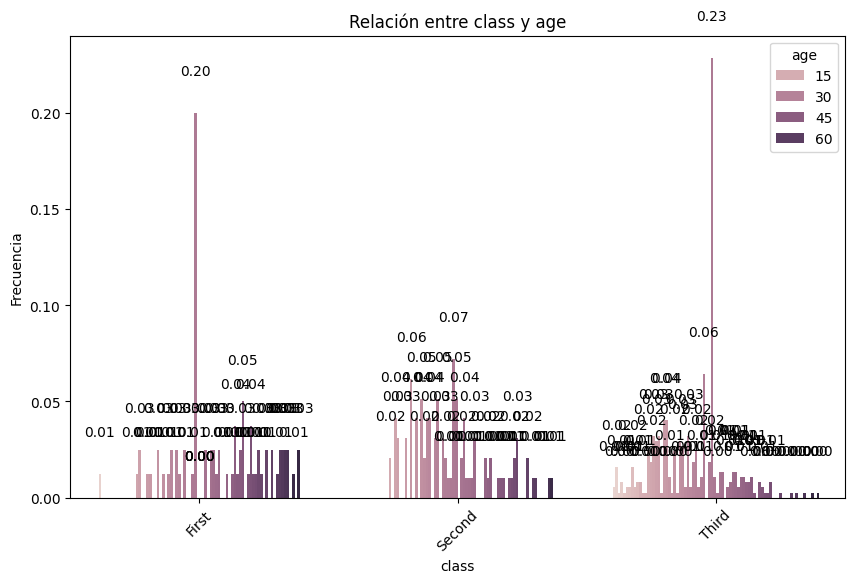

Respuesta yes:


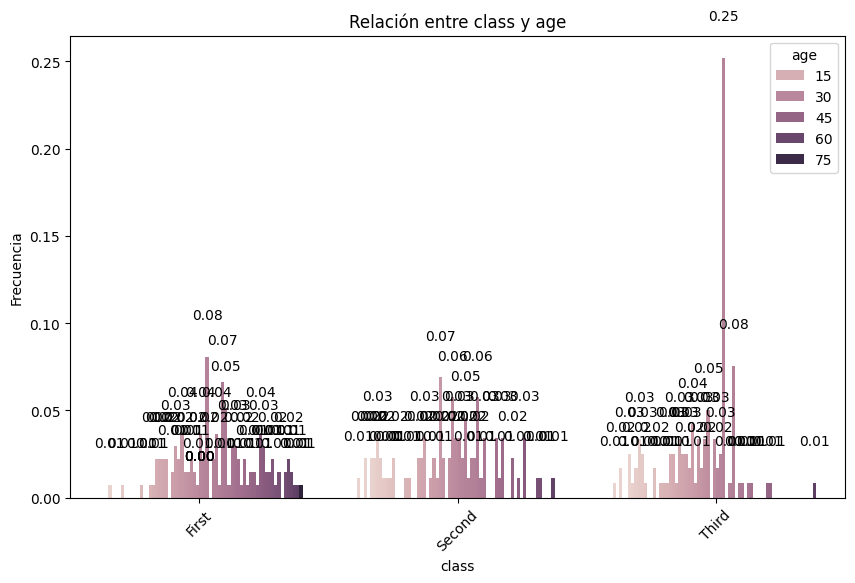

In [114]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True, size_group = 30)

In [115]:
#8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?
col_directora = "alive"
col_1 = "age"
col_2 = "fare"
diccionario_multivariante = {}
for valor in df[col_directora].unique():
    diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta no:


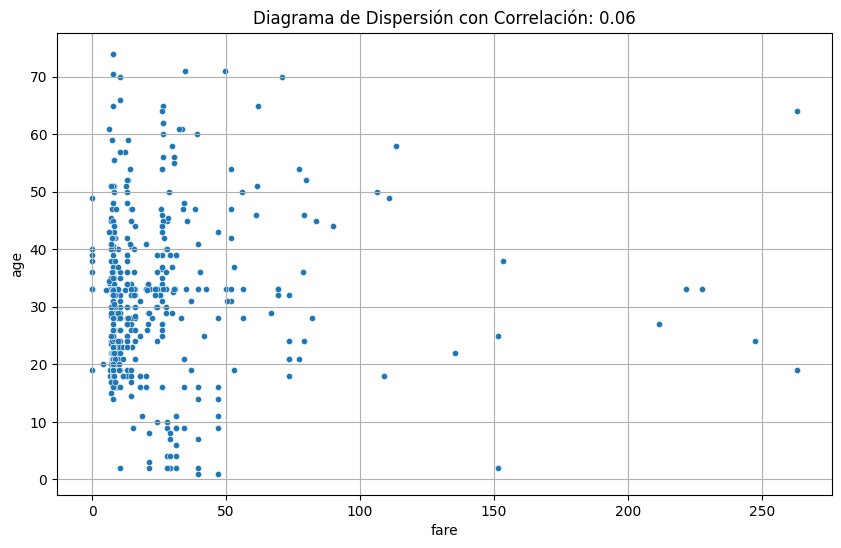

Respuesta yes:


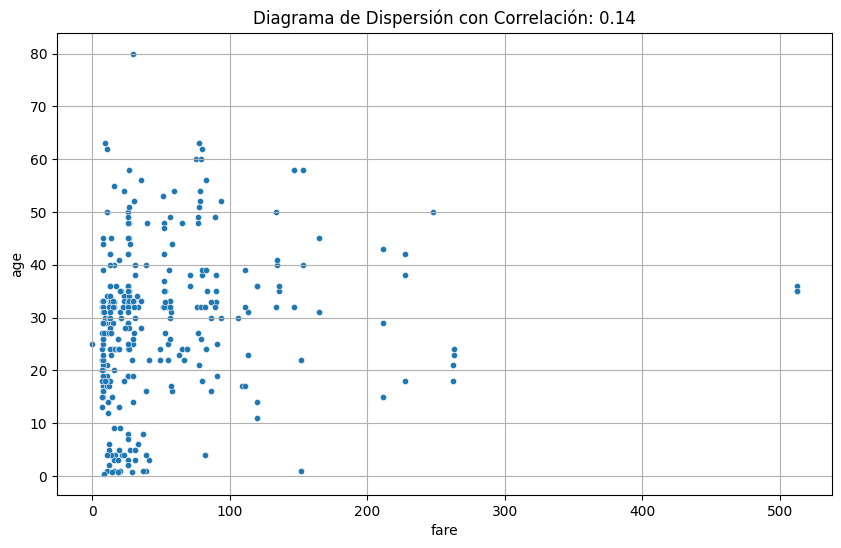

In [116]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [118]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun.csv")

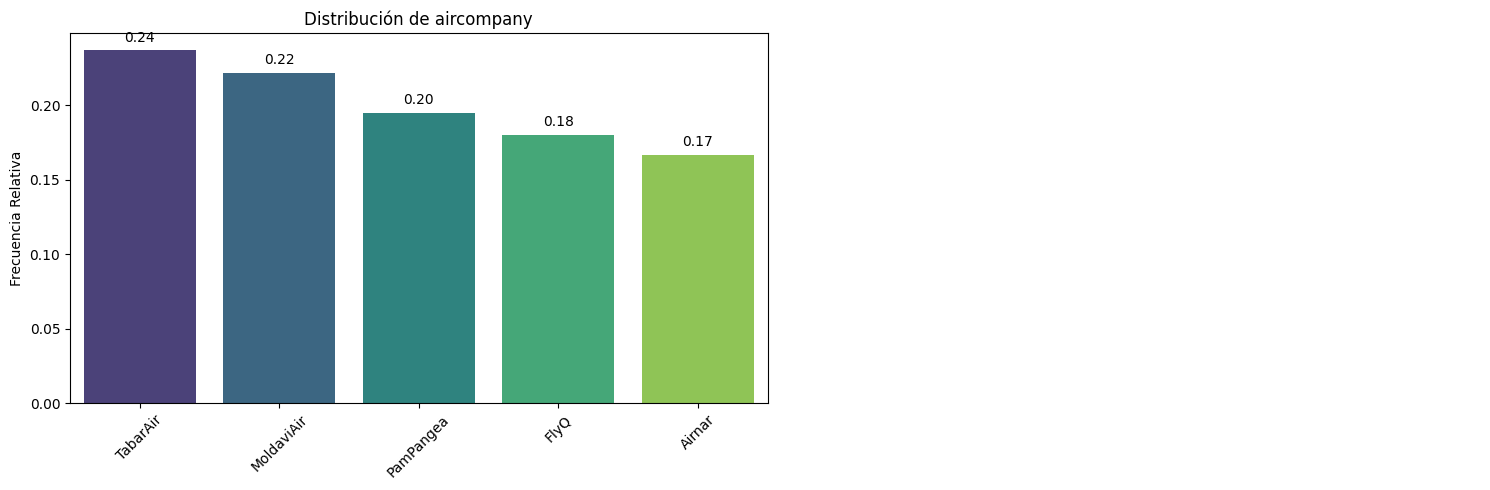

In [123]:
pinta_distribucion_categoricas(df_air_jun,["aircompany"], relativa= True, mostrar_valores= True)

(2,)


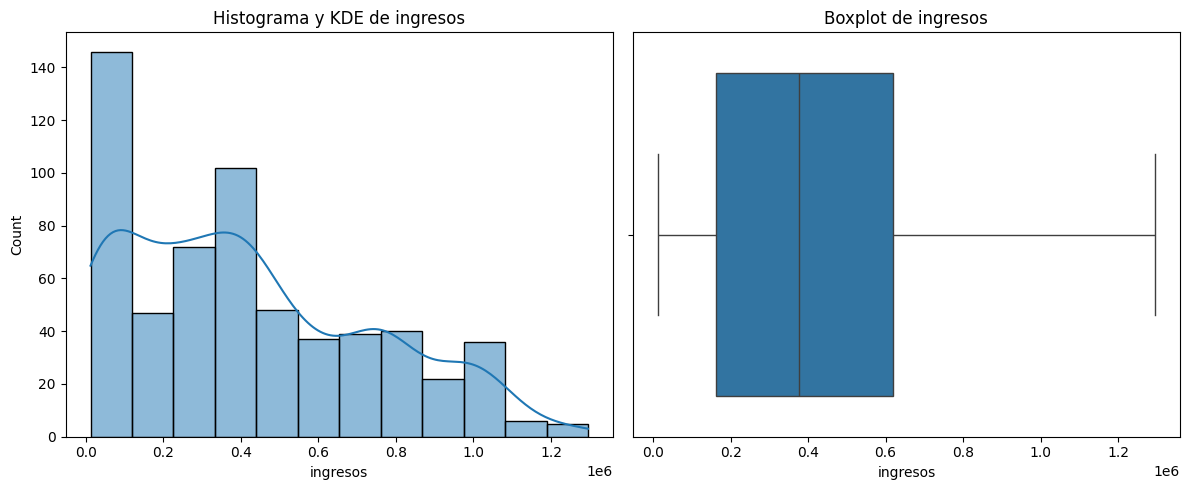

In [124]:
plot_combined_graphs(df_air_jun,["ingresos"]) #no hay anomalos realmente

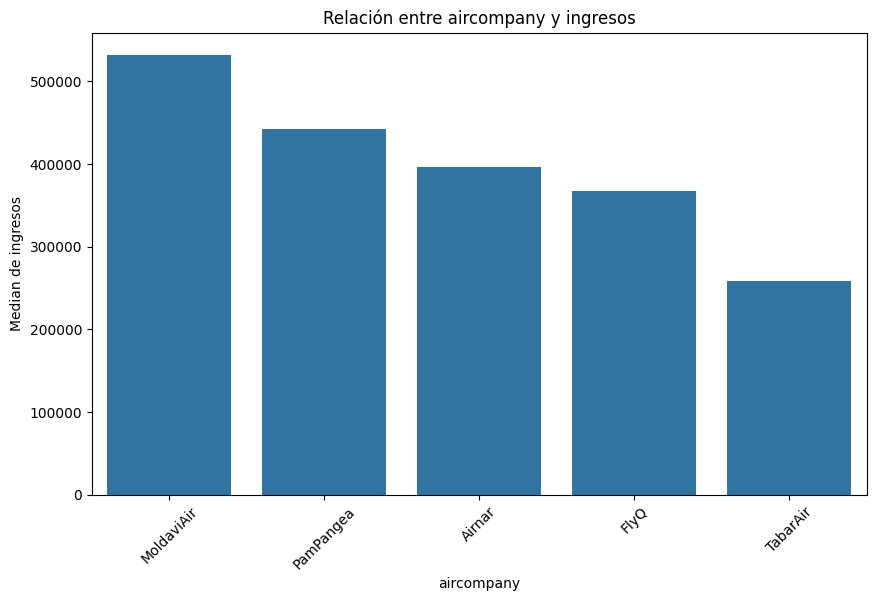

In [125]:
plot_categorical_numerical_relationship(df_air_jun, "aircompany","ingresos",measure="median") # Utilizando mediana


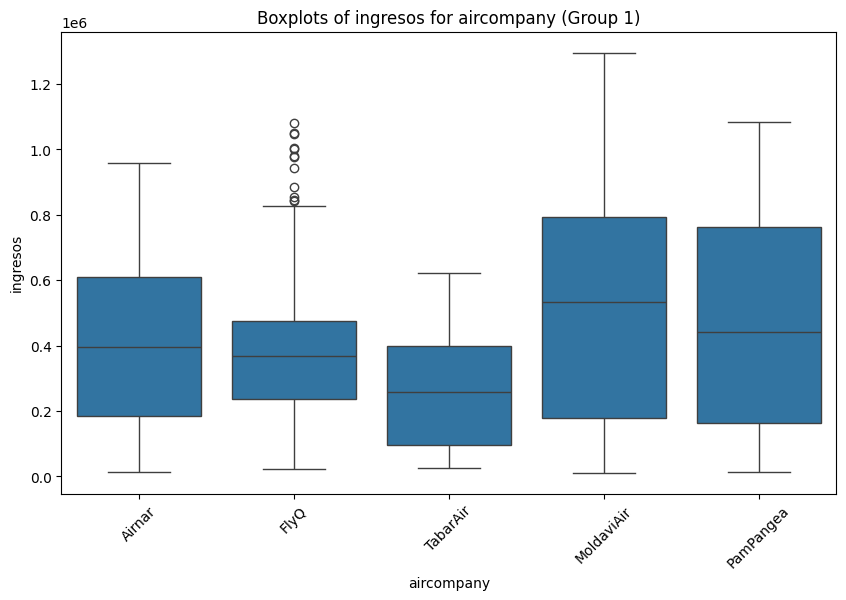

In [126]:
plot_grouped_boxplots(df_air_jun,"aircompany","ingresos")

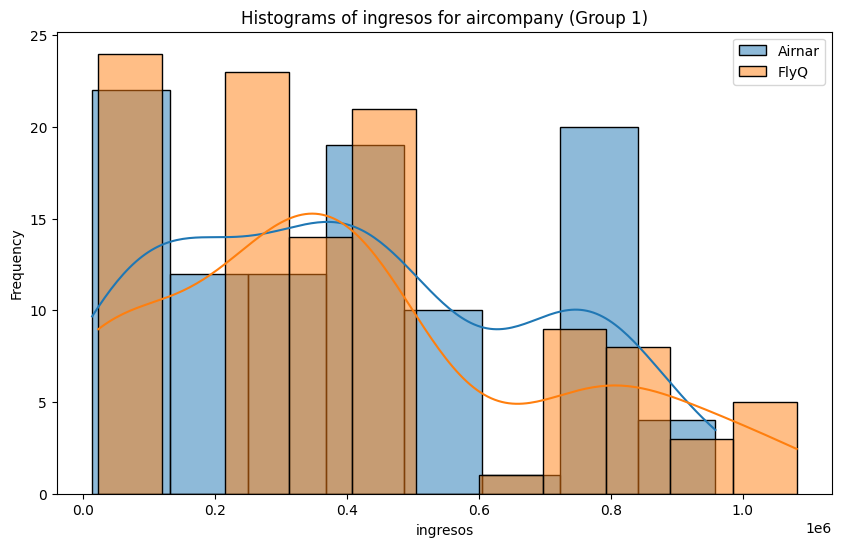

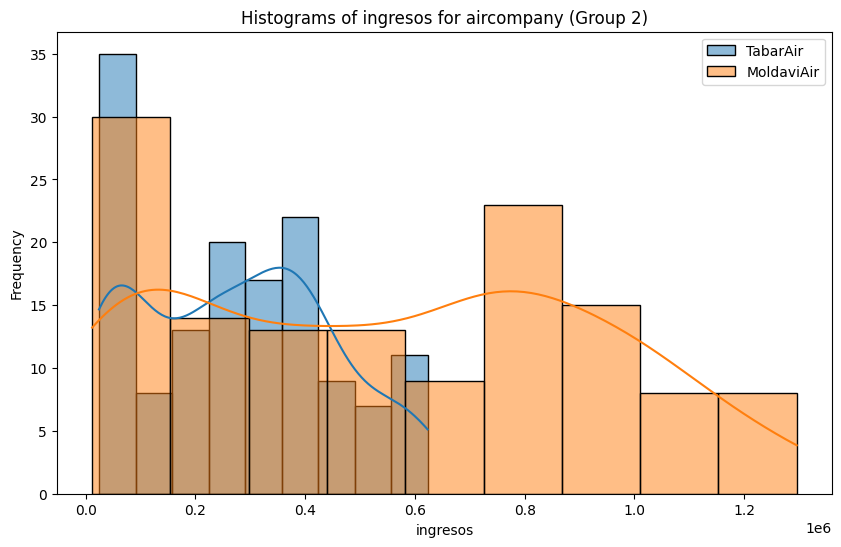

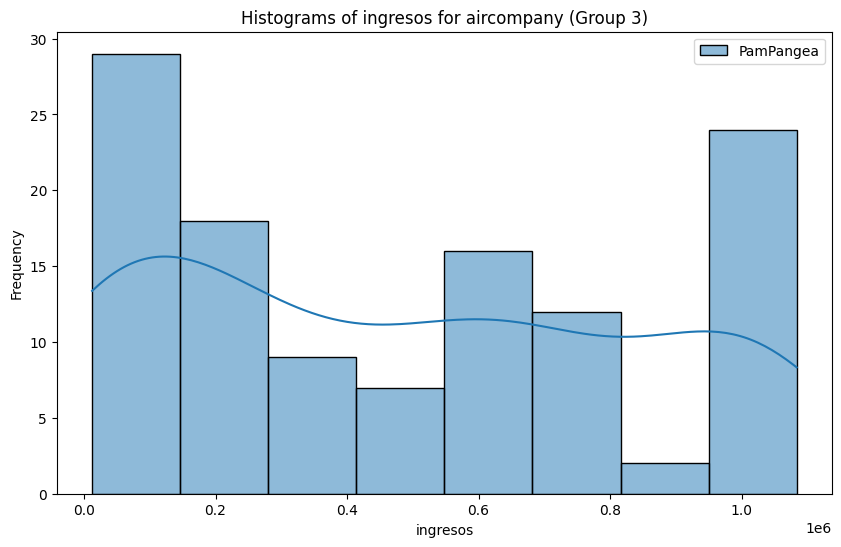

In [127]:
plot_grouped_histograms(df_air_jun,"aircompany", "ingresos", 2)

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


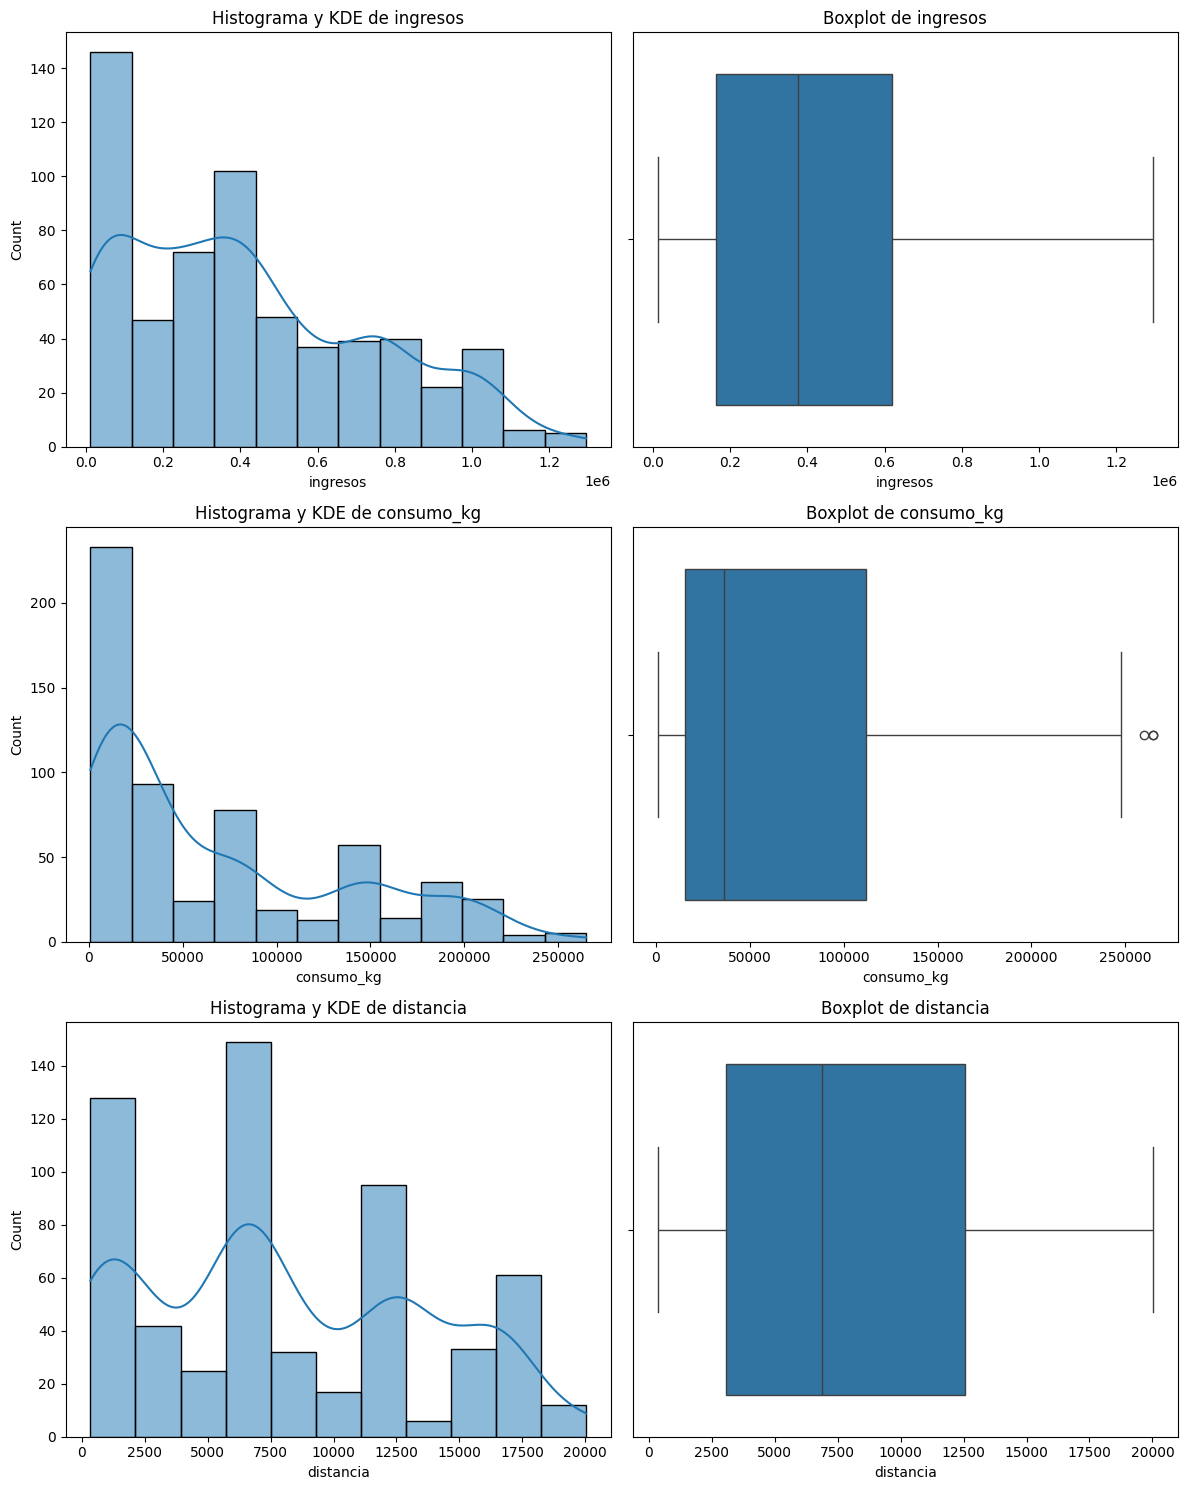

In [119]:
plot_combined_graphs(df_air_jun,["ingresos","consumo_kg","distancia"])

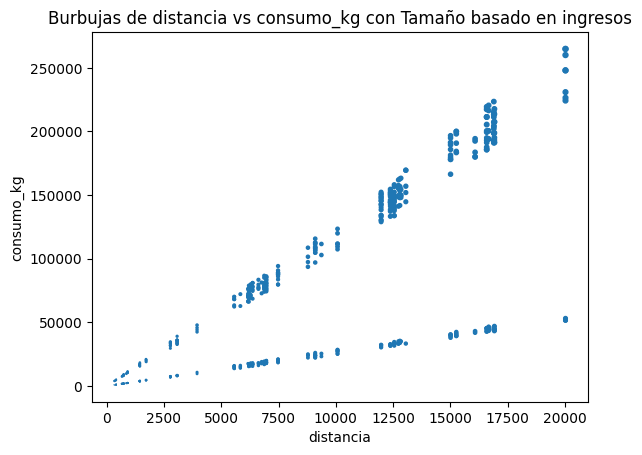

In [121]:
bubble_plot(df_air_jun,"distancia","consumo_kg","ingresos", scale = 100000)

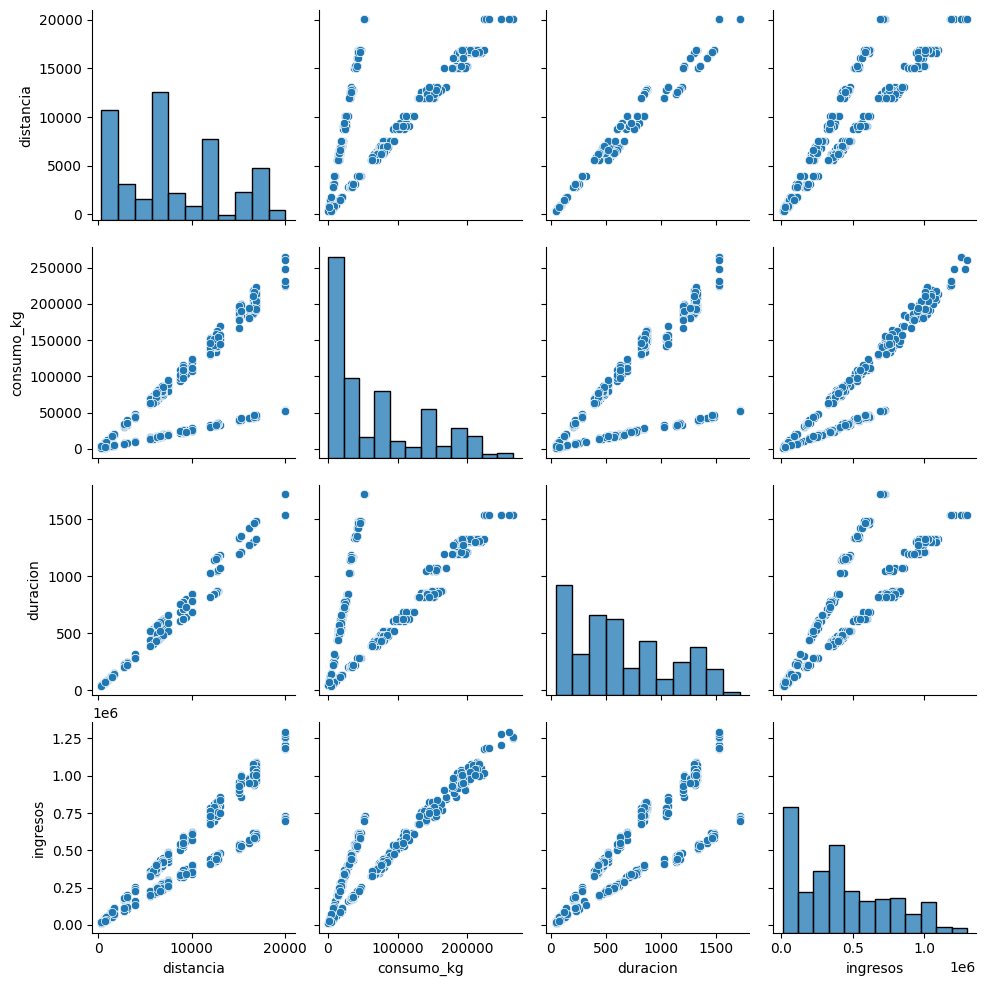

In [122]:
df_solo_numeros = df_air_jun.select_dtypes(include = ["float","int"])
df_solo_numeros.columns
sns.pairplot(df_solo_numeros)
plt.show()

Parece que los vuelos de corta duración son más eficientes 

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Realiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [ ]:
df_air_jun.describe()
#Hago las categorías segun los quartiles

,distancia,consumo_kg,duracion,ingresos
count,600.000000,600.000000,600.000000,6.000000e+02
mean,8071.003333,68240.520508,635.873333,4.187689e+05
std,5550.244086,67441.849592,450.474786,3.182858e+05
min,344.000000,835.920000,42.000000,1.179785e+04
25%,3073.000000,15733.520400,224.000000,1.627668e+05
50%,6877.000000,36033.998000,542.000000,3.754817e+05
75%,12553.000000,111717.652800,876.000000,6.188420e+05
max,20029.000000,264876.314560,1721.000000,1.295516e+06


In [131]:
bins = [344.000000, 3073.000000, 6877.000000,12553.000000, 	20029.000000]
labels = ['corto', 'medio', 'largo', 'muy largo']
df_air_jun['cat_vuelo'] = pd.cut(df_air_jun['distancia'], bins=bins, labels=labels, include_lowest=True)

In [133]:
col_directora = "cat_vuelo"
col_1 = "ingresos"
col_2 = "consumo_kg"
diccionario_multivariante = {}
for valor in df_air_jun[col_directora].unique():
    diccionario_multivariante[valor] = df_air_jun.loc[df_air_jun[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta corto:


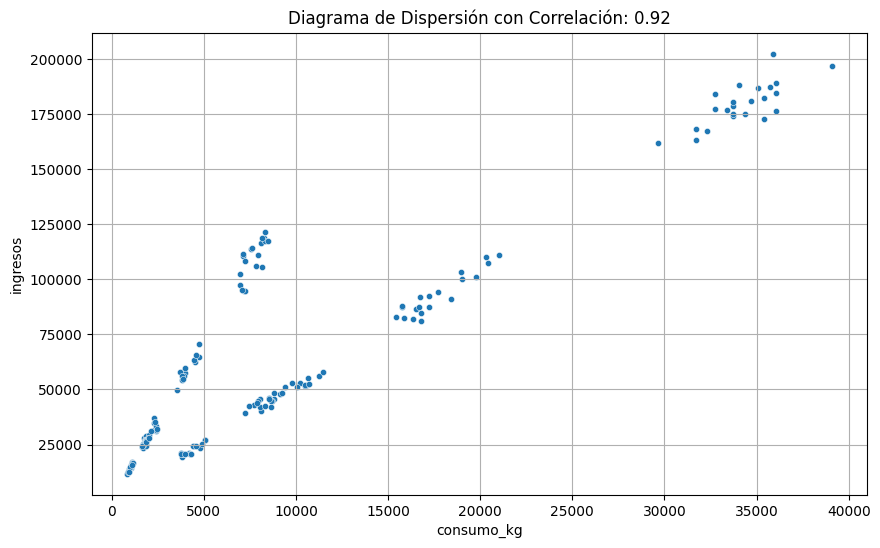

Respuesta muy largo:


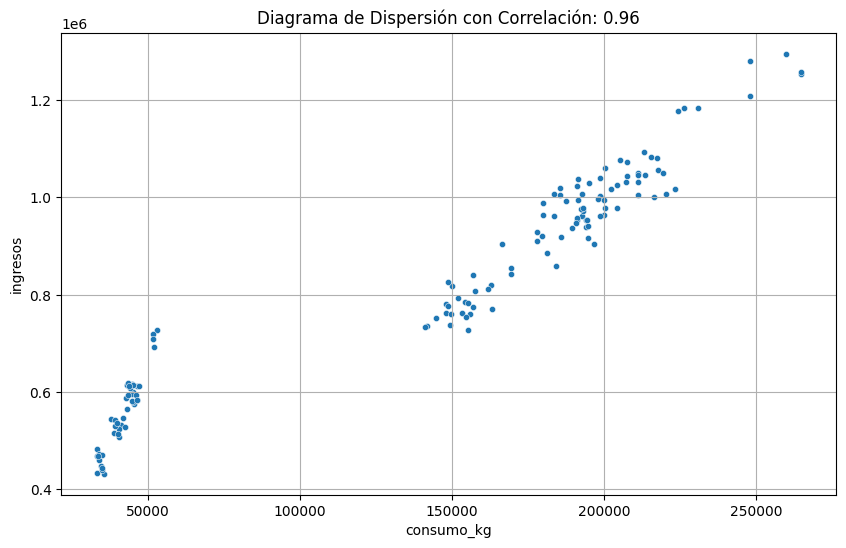

Respuesta largo:


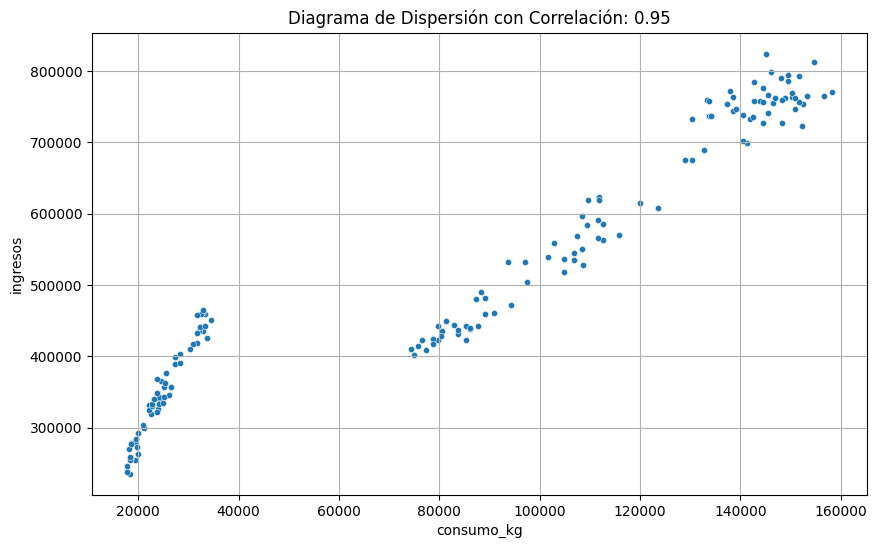

Respuesta medio:


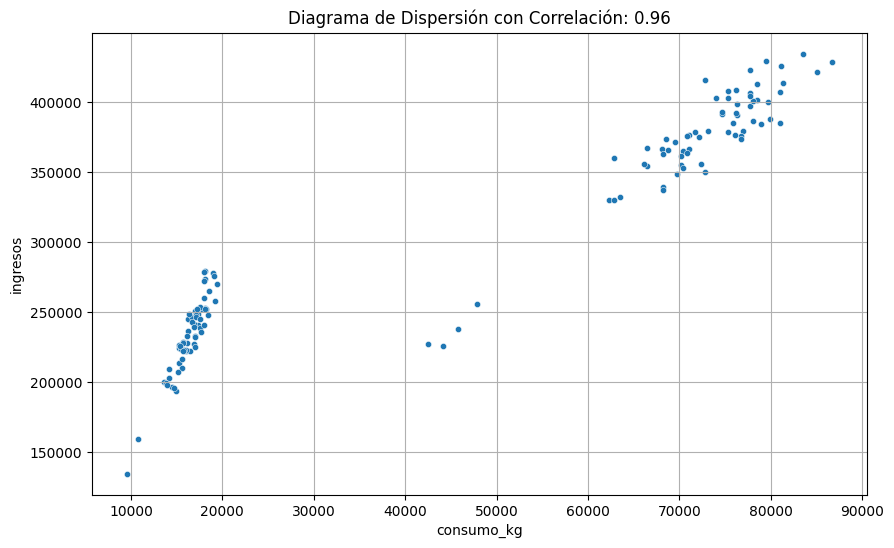

In [136]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.